In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fraudTest.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
# Convert transaction date n time and date of birth columns type into date type
# Date type can be used for better visualisation

# Convert 'dob' column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# Convert 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [7]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Print the columns to verify the changes
print(df.columns)

Index(['Unnamed:_0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [8]:
# Replace gender (possible cases) value with 0 and 1
# 0 represent female and 1 represent male
df['gender'] = df['gender'].str.lower()

# Replace values based on conditions
df['gender'] = df['gender'].apply(lambda x: 1 if x.startswith('m') else (0 if x.startswith('f') else None))


In [9]:
df

,Unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:00,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:00,3556613125071650,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:00,6011724471098080,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:00,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [10]:
# Delete the Unnamed column from dataset 
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed:')]
df.drop(unnamed_columns, axis=1, inplace=True)
print(df.columns)
print(unnamed_columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
['Unnamed:_0']


In [11]:
print(df.describe())
print(df.info())

             cc_num            amt         gender            zip  \
count  5.557190e+05  555719.000000  555719.000000  555719.000000   
mean   4.178387e+17      69.392810       0.451367   48842.628015   
std    1.309837e+18     156.745941       0.497630   26855.283328   
min    6.041621e+10       1.000000       0.000000    1257.000000   
25%    1.800429e+14       9.630000       0.000000   26292.000000   
50%    3.521417e+15      47.290000       0.000000   48174.000000   
75%    4.635331e+15      83.010000       1.000000   72011.000000   
max    4.992346e+18   22768.110000       1.000000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [12]:
# Check the inconsistent value in dataset and replace value with suitable value 


In [13]:
if df.isnull().any().any():
    # Handling missing values based on data types
    for col in df.columns:
        if df[col].dtype == 'object':
            # Replace missing values in object columns with mode
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
        elif df[col].dtype in ['int64', 'float64']:
            # Replace missing values in numeric columns with mean
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

    # Verify if there are any remaining missing values
    missing_values_after = df.isnull().sum()
    print("\nMissing values after handling:")
    print(missing_values_after)
else:
    print("No missing values found in the dataset.")            
            


No missing values found in the dataset.


In [14]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:00,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:00,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:00,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:00,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:00,3556613125071650,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:00,6011724471098080,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:00,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [15]:
# Convert all string columns to lowercase
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.lower()

# Display the first few rows to verify
#This is for test. is it in lower or not
print(df.head())



  trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:00  2291163933867240   
1   2020-06-21 12:14:00  3573030041201290   
2   2020-06-21 12:14:00  3598215285024750   
3   2020-06-21 12:15:00  3591919803438420   
4   2020-06-21 12:15:00  3526826139003040   

                               merchant        category    amt   first  \
0                 fraud_kirlin and sons   personal_care   2.86    jeff   
1                  fraud_sporer-keebler   personal_care  29.84  joanne   
2  fraud_swaniawski, nitzsche and welch  health_fitness  41.28  ashley   
3                     fraud_haley group        misc_pos  60.05   brian   
4                 fraud_johnston-casper          travel   3.19  nathan   

       last  gender                       street        city  ...      lat  \
0   elliott       1            351 darlene green    columbia  ...  33.9659   
1  williams       0             3638 marsh union     altonah  ...  40.3207   
2     lopez       0         9333 valentine point  

In [16]:
# Identify duplicate (if any) delete duplicate records
duplicate = df.duplicated().sum()
if duplicate >0:
    df = df.drop_duplicates()

# Visualisation of Dataset


### Top 10 States of US with the Most Fraudulent Transactions

state
ny    175
pa    114
tx    113
il     76
ca     76
in     75
va     75
mn     73
mo     71
ia     69
Name: is_fraud, dtype: int64


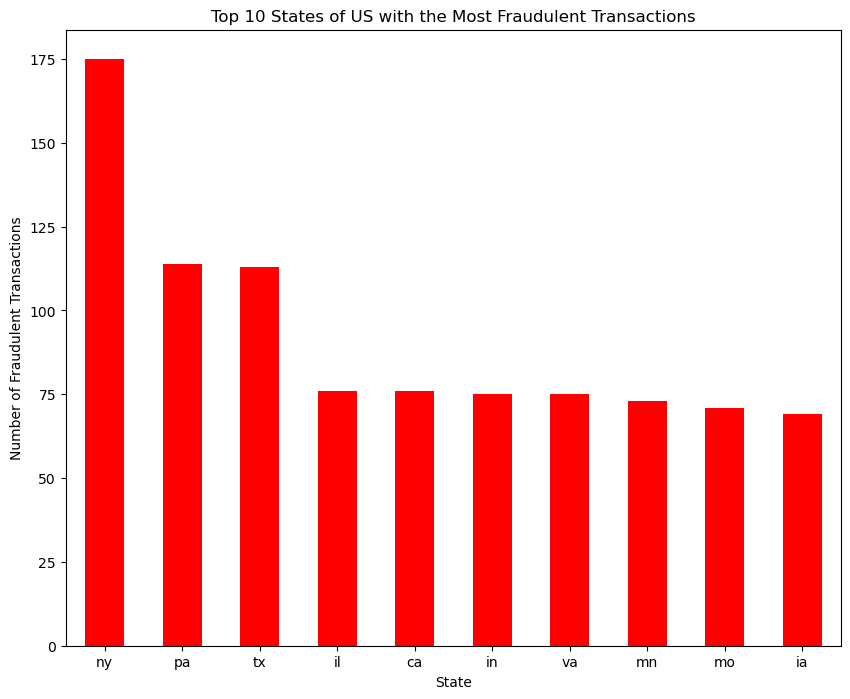

In [17]:
# Group by 'state' and sum the 'is_fraud' column to get the count of fraudulent transactions for each state
fraud_by_state = df.groupby('state')['is_fraud'].sum().sort_values(ascending=False)

# Display top 10 states with the most fraudulent transactions

# Print the state with the most fraudulent transactions
print(fraud_by_state.head(10))  

# Visualize the top 10 states with the most fraudulent transactions
plt.figure(figsize=(10, 8))
fraud_by_state.head(10).plot(kind='bar', color='red')
plt.title('Top 10 States of US with the Most Fraudulent Transactions')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.show()


It is just for practice

In [18]:
# Convert 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Print the data type of 'dob' to confirm the conversion
print(df['dob'].dtype)


datetime64[ns]


### Number of Fraudulent Transactions over Time period from June 2020 to Dec 2020 in US states

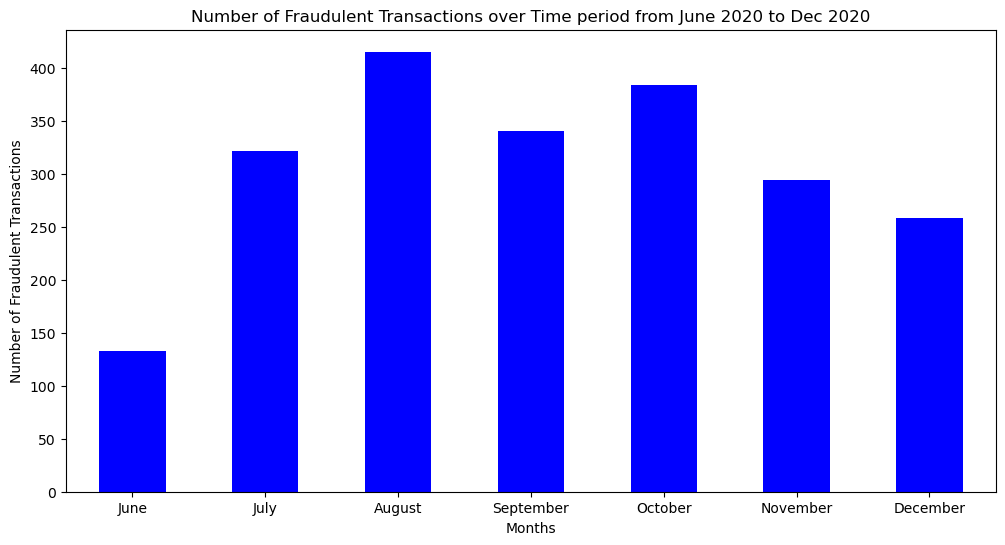

In [34]:
# Extract month and year from 'trans_date_trans_time'
df['month'] = df['trans_date_trans_time'].dt.to_period('M')

# Group by month and count the number of fraudulent transactions
fraud_by_month = df[df['is_fraud'] == 1].groupby('month').size()

# Convert period to string with month name
fraud_by_month.index = fraud_by_month.index.to_timestamp().strftime('%B')

# Visualize the number of fraudulent transactions per month
plt.figure(figsize=(12, 6))
fraud_by_month.plot(kind='bar', color='blue')
plt.title('Number of Fraudulent Transactions over Time period from June 2020 to Dec 2020')
plt.xlabel('Months')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.show()


### Fraudulent Transactions by Category over Time period from June 2020 to Dec 2020 in US states

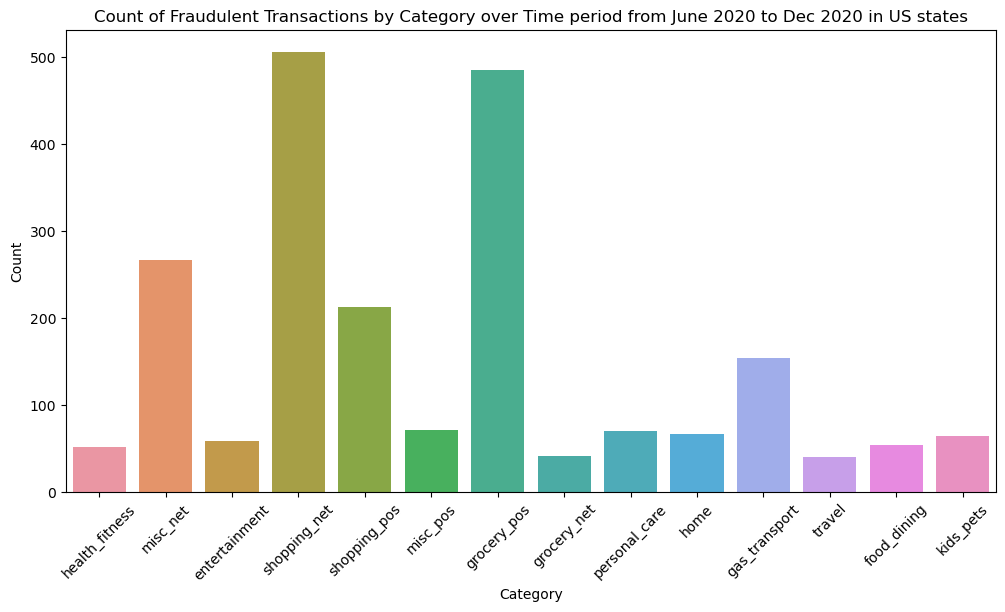

In [20]:
# Filter the DataFrame to include only fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_df, x='category')
plt.title('Count of Fraudulent Transactions by Category over Time period from June 2020 to Dec 2020 in US states')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


## Gender Distribution in Fraudulent Transactions

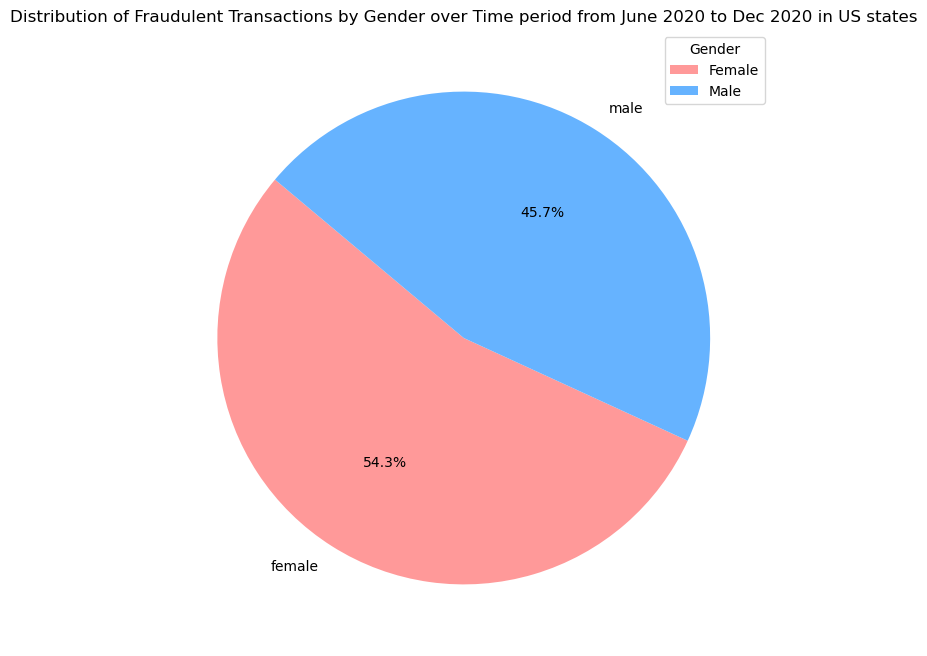

In [21]:
# Filter the DataFrame for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Count fraudulent transactions by gender
fraud_gender_counts = fraudulent_transactions['gender'].replace({0: 'female', 1: 'male'}).value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_gender_counts, labels=fraud_gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Fraudulent Transactions by Gender over Time period from June 2020 to Dec 2020 in US states')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.show()


In [26]:
# Extract month from 'trans_date_trans_time'
df['month'] = df['trans_date_trans_time'].dt.month

# Filter the DataFrame for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Group by month and sum the 'amt' for fraudulent transactions
monthly_fraud_amount = fraudulent_transactions.groupby('month')['amt'].sum()

# Map month numbers to month names
monthly_fraud_amount.index = fraud_by_month.index.to_timestamp().strftime('%B')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
monthly_fraud_amount.plot(kind='bar', color='skyblue')
plt.title('Total Amount of Fraudulent Transactions Across Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'Index' object has no attribute 'to_timestamp'

### Visualisation of correlation between numeric columns

              cc_num       amt    gender       zip       lat      long  \
cc_num      1.000000  0.001963 -0.001482  0.041610 -0.057512 -0.048783   
amt         0.001963  1.000000  0.000027  0.002310  0.002339 -0.002046   
gender     -0.001482  0.000027  1.000000 -0.066467  0.042692  0.051235   
zip         0.041610  0.002310 -0.066467  1.000000 -0.115173 -0.909942   
lat        -0.057512  0.002339  0.042692 -0.115173  1.000000 -0.012892   
long       -0.048783 -0.002046  0.051235 -0.909942 -0.012892  1.000000   
city_pop   -0.009414  0.002760 -0.029367  0.075571 -0.152666 -0.051524   
unix_time  -0.000810 -0.000974 -0.000577  0.001395  0.000301 -0.001460   
merch_lat  -0.057183  0.002404  0.042569 -0.114809  0.993557 -0.012551   
merch_long -0.048818 -0.002053  0.051203 -0.909117 -0.012831  0.999115   
is_fraud   -0.001540  0.182267  0.000748 -0.002271  0.005863 -0.000972   
month      -0.000542 -0.000717 -0.000445  0.001401  0.000686 -0.001510   

            city_pop  unix_time  merc

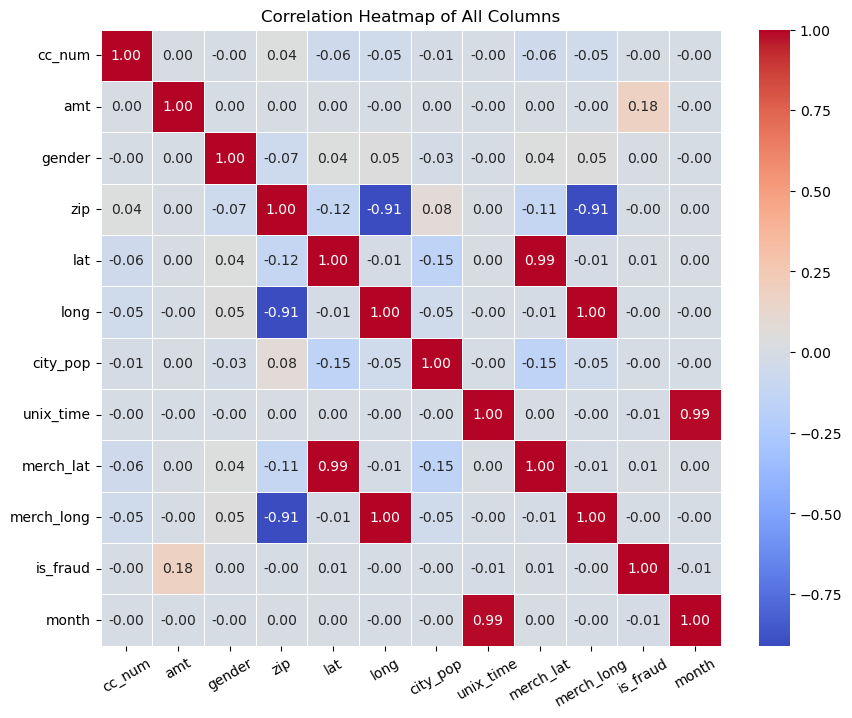

In [23]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Columns')

# Rotate the x-axis labels
plt.xticks(rotation=30)
plt.yticks(rotation=0)  # Ensure y-axis labels remain horizontal

plt.show()


In [24]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)


              cc_num       amt    gender       zip       lat      long  \
cc_num      1.000000  0.001963 -0.001482  0.041610 -0.057512 -0.048783   
amt         0.001963  1.000000  0.000027  0.002310  0.002339 -0.002046   
gender     -0.001482  0.000027  1.000000 -0.066467  0.042692  0.051235   
zip         0.041610  0.002310 -0.066467  1.000000 -0.115173 -0.909942   
lat        -0.057512  0.002339  0.042692 -0.115173  1.000000 -0.012892   
long       -0.048783 -0.002046  0.051235 -0.909942 -0.012892  1.000000   
city_pop   -0.009414  0.002760 -0.029367  0.075571 -0.152666 -0.051524   
unix_time  -0.000810 -0.000974 -0.000577  0.001395  0.000301 -0.001460   
merch_lat  -0.057183  0.002404  0.042569 -0.114809  0.993557 -0.012551   
merch_long -0.048818 -0.002053  0.051203 -0.909117 -0.012831  0.999115   
is_fraud   -0.001540  0.182267  0.000748 -0.002271  0.005863 -0.000972   
month      -0.000542 -0.000717 -0.000445  0.001401  0.000686 -0.001510   

            city_pop  unix_time  merc